In [1]:
import os

os.chdir('../../test_data/system_tests/sensitivity_tests/Spectronaut_LargeFC/')

In [2]:
import pandas as pd

annotation_file = "20210210_154121_S209-S-1-240min_Reportv2.annotation.tsv"
annoation_df = pd.read_csv(annotation_file, sep='\t').rename(columns={"PG.Organisms": "organism"})

results_dirs = ["results_fcdiff0_clusterpval005", "results_fcdiff0.5_clusterpval001", "results_fcdiff0_clusterpval0001", "results_fcdiff0_clusterpval02", "results_default", "results_default_new"]
method_suffices = [results_dir.replace('results', '') for results_dir in results_dirs]
results_dfs_list = []

for results_dir in results_dirs:
    results_df = pd.read_csv(results_dir + "/S1_VS_S2.results.tsv", sep='\t')
    results_df = results_df.merge(annoation_df, on = 'protein', how = 'left')
    results_df = results_df.rename(columns={'total_intensity' : 'intensity'}).set_index(['condition_pair', 'organism', 'protein'])
    results_df.columns = [ col + '_'+results_dir.replace('results_', '') for col in results_df.columns]
    #results_df = results_df.reset_index()
    results_dfs_list.append(results_df)


df_combined = pd.concat(results_dfs_list, axis=1).reset_index()
display(df_combined)

,condition_pair,organism,protein,p_value_fcdiff0_clusterpval005,log2fc_fcdiff0_clusterpval005,number_of_ions_fcdiff0_clusterpval005,quality_score_fcdiff0_clusterpval005,intensity_fcdiff0_clusterpval005,num_peptides_fcdiff0_clusterpval005,fdr_fcdiff0_clusterpval005,...,PG.Organisms_default,fdr_default,p_value_default_new,log2fc_default_new,number_of_ions_default_new,quality_score_default_new,intensity_default_new,num_peptides_default_new,PG.Organisms_default_new,fdr_default_new
0,S1_VS_S2,Homo sapiens,O75369-8,8.556124e-05,0.023249,3093,0.643021,4.870927e+05,153,3.336579e-04,...,Homo sapiens,5.016901e-06,6.961901e-06,0.023167,3093,0.656739,1.827951e+09,153,Homo sapiens,2.881639e-05
1,S1_VS_S2,Homo sapiens,Q5QJE6,9.562088e-02,0.006449,225,0.045512,2.028335e+05,19,2.105170e-01,...,Homo sapiens,3.896433e-01,1.716155e-01,0.061371,225,0.045462,3.938819e+07,19,Homo sapiens,3.305103e-01
2,S1_VS_S2,Homo sapiens,P23919,4.680354e-01,0.008074,263,0.052785,4.464541e+05,17,6.539006e-01,...,Homo sapiens,5.922138e-01,3.278079e-01,0.004569,263,0.056338,1.220240e+08,17,Homo sapiens,5.173200e-01
3,S1_VS_S2,Escherichia coli (strain K12),P0A7J3,4.280971e-16,-2.265701,106,0.021886,2.154438e+06,9,4.979030e-15,...,Escherichia coli (strain K12),4.967637e-15,1.524813e-15,-2.220017,106,0.018763,1.128454e+08,9,Escherichia coli (strain K12),1.129986e-14
4,S1_VS_S2,Homo sapiens,P49840,1.417933e-01,0.177281,95,0.014818,1.237277e+05,10,2.853065e-01,...,Homo sapiens,5.466042e-01,7.314652e-02,0.005664,95,0.017319,1.432492e+07,10,Homo sapiens,1.722984e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8621,S1_VS_S2,Caenorhabditis elegans,O17328,7.809087e-12,-1.443542,7,0.001291,3.280866e+05,1,3.579234e-11,...,Caenorhabditis elegans,2.121342e-09,4.692233e-10,-1.434844,7,0.001515,7.106165e+05,1,Caenorhabditis elegans,2.150648e-09
8622,S1_VS_S2,Caenorhabditis elegans,Q20158,1.143521e-08,-1.222336,6,0.000735,1.870906e+05,1,4.924620e-08,...,Caenorhabditis elegans,4.537153e-09,1.143521e-08,-1.222336,6,0.001014,7.483625e+05,1,Caenorhabditis elegans,5.030094e-08
8623,S1_VS_S2,Saccharomyces cerevisiae (strain ATCC 204508 /...,P14904,8.133148e-06,0.931999,9,0.000234,1.351148e+04,1,3.296830e-05,...,Saccharomyces cerevisiae (strain ATCC 204508 /...,3.350360e-05,8.133148e-06,0.931999,9,0.000425,4.087113e+04,1,Saccharomyces cerevisiae (strain ATCC 204508 /...,3.355167e-05
8624,S1_VS_S2,Homo sapiens,Q8NEZ2;Q8NEZ2-2;Q8NEZ2-3,2.903015e-01,0.159174,5,0.000623,1.199346e+03,1,4.777357e-01,...,Homo sapiens,2.812820e-01,1.365291e-01,0.175783,5,0.000621,7.909684e+03,1,Homo sapiens,2.794325e-01


/Users/constantin/workspace/alphaquant/alphaquant/benchm/ratios.py:144: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  self.fig.tight_layout()


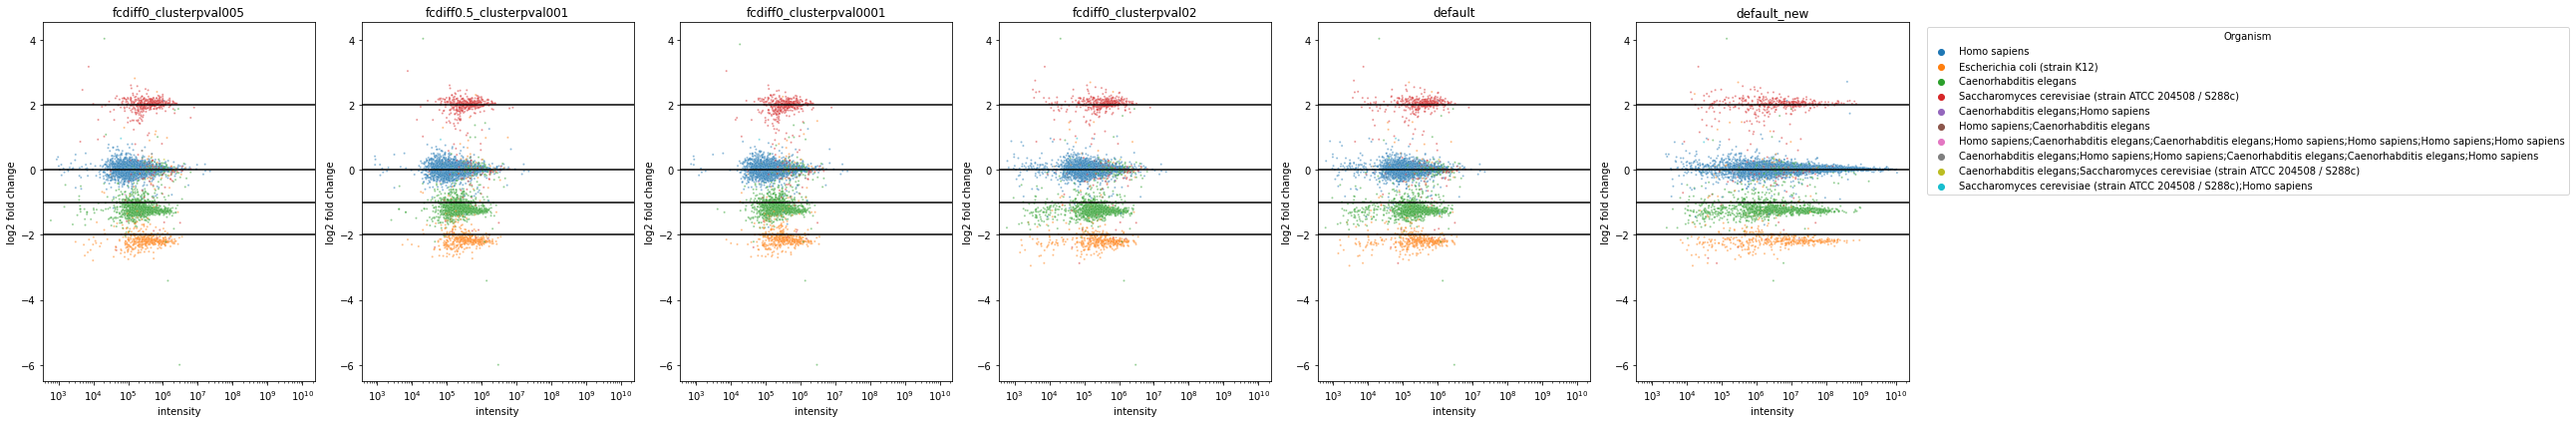

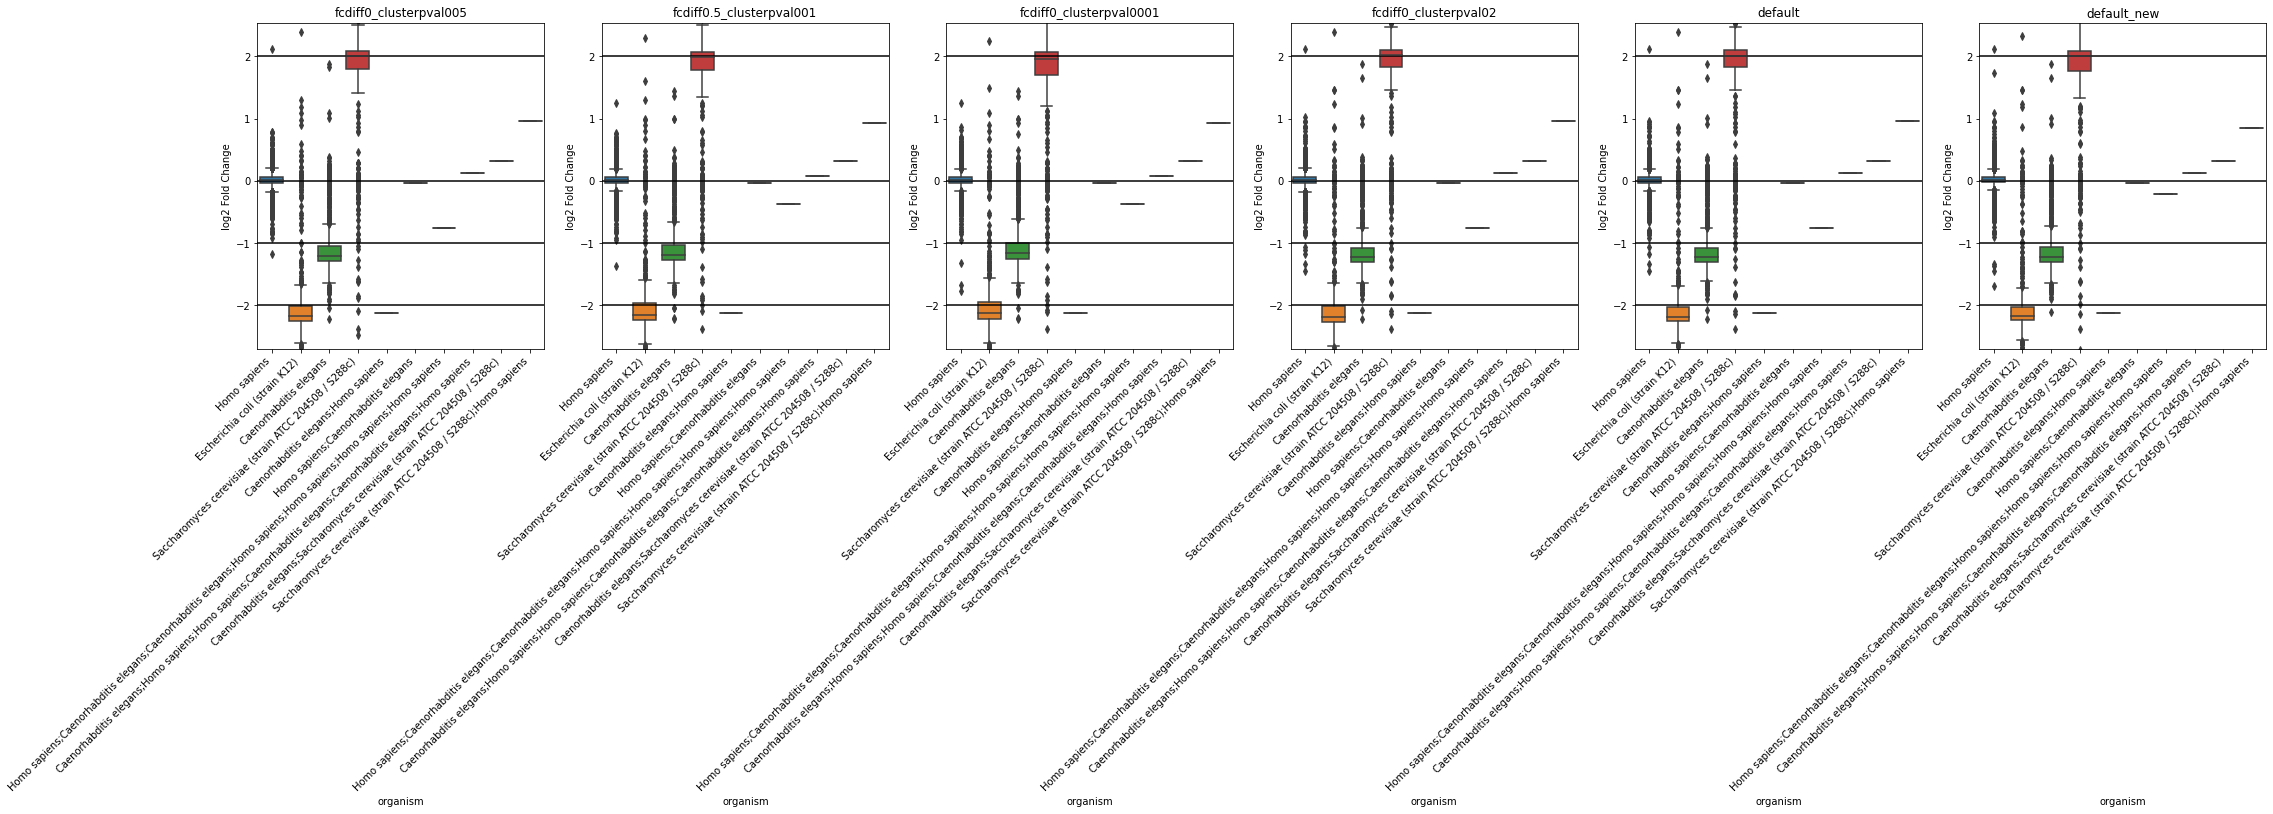

In [3]:
import alphaquant.benchm.ratios as aq_benchm_ratios

scatter_plotter = aq_benchm_ratios.MixedSpeciesScatterPlotter(df_combined=df_combined, method_suffixes=method_suffices, expected_log2fcs=[-2, -1,0,  2], figure_size=[6, 6])
aq_benchm_ratios.MixedSpeciesBoxPlotter(df_combined=df_combined, method_suffixes=method_suffices, expected_log2fcs=[-2, -1,0,  2], figure_size=[6, 6])

